### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [1]:
#your code here
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
#your code here
data = pd.read_csv('data.csv')
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [3]:
#your code here
data.info

<bound method DataFrame.info of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>

In [4]:
data.shape

(100000, 4)

In [5]:
data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [7]:
data.isnull()

,user id,movie id,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99995,False,False,False,False
99996,False,False,False,False
99997,False,False,False,False
99998,False,False,False,False


In [8]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
    return missing_data 
missing_check(data)

,Total,Percent
timestamp,0,0.0
rating,0,0.0
movie id,0,0.0
user id,0,0.0


In [9]:
item.info

<bound method DataFrame.info of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Childre

In [10]:
item.shape

(1681, 22)

In [11]:
item.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
    return missing_data 
missing_check(item)

,Total,Percent
Western,0,0.0
War,0,0.0
movie title,0,0.0
release date,0,0.0
unknown,0,0.0
Action,0,0.0
Adventure,0,0.0
Animation,0,0.0
Childrens,0,0.0
Comedy,0,0.0


In [13]:
user.info

<bound method DataFrame.info of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>

In [14]:
user.shape

(943, 5)

In [15]:
user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [16]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
    return missing_data 
missing_check(user)

,Total,Percent
zip code,0,0.0
occupation,0,0.0
gender,0,0.0
age,0,0.0
user id,0,0.0


**Observations:**



### 4. Find the number of movies per genre using the item data - 2.5 marks

In [17]:
#your code here
df = pd.DataFrame(item,columns=['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])
sum_column = df.sum(axis=0)
print (sum_column)

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


**Insights:**



### 5. Drop the movie where the genre is unknown - 2.5 marks

In [20]:
#your code here
item = item[item['unknown']!=1]
item.sum()

movie id                                                  1413763
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         0
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

**Insights:**


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [23]:
#your code here
t1 = pd.DataFrame(item, columns = ['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])
col_list= list(t1)
item['total']=item[col_list].sum(axis=1)
item1=item.groupby(
   ['movie title']
).agg(
    {
        'total':sum,
    }
).reset_index()
item1

,movie title,total
0,'Til There Was You,2
1,1-900,1
2,101 Dalmatians,2
3,12 Angry Men,1
4,187,1
...,...,...
1652,Young Guns,3
1653,Young Guns II,3
1654,"Young Poisoner's Handbook, The",1
1655,Zeus and Roxanne,1


In [24]:
tot = item1['total'] > 1
item2=item1[tot]
item1[tot]

,movie title,total
0,'Til There Was You,2
2,101 Dalmatians,2
6,"20,000 Leagues Under the Sea",4
7,2001: A Space Odyssey,4
8,3 Ninjas: High Noon At Mega Mountain,2
...,...,...
1648,Yankee Zulu,2
1651,Young Frankenstein,2
1652,Young Guns,3
1653,Young Guns II,3


In [25]:
print(item2[['movie title']])

                                movie title
0                       'Til There Was You 
2                           101 Dalmatians 
6             20,000 Leagues Under the Sea 
7                    2001: A Space Odyssey 
8     3 Ninjas: High Noon At Mega Mountain 
...                                     ...
1648                           Yankee Zulu 
1651                    Young Frankenstein 
1652                            Young Guns 
1653                         Young Guns II 
1656           Á köldum klaka (Cold Fever) 

[848 rows x 1 columns]


**Insights:**



### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [18]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


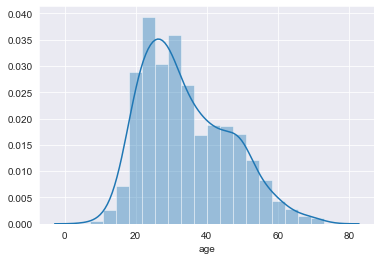

In [27]:
#your code here
sns.distplot(user['age']);

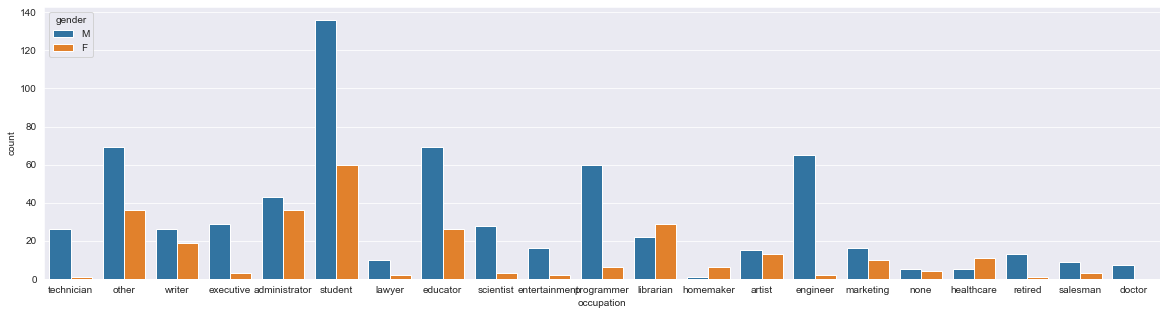

In [28]:
plt.figure(figsize=(20,5))
sns.countplot(user['occupation'],hue=user['gender']);

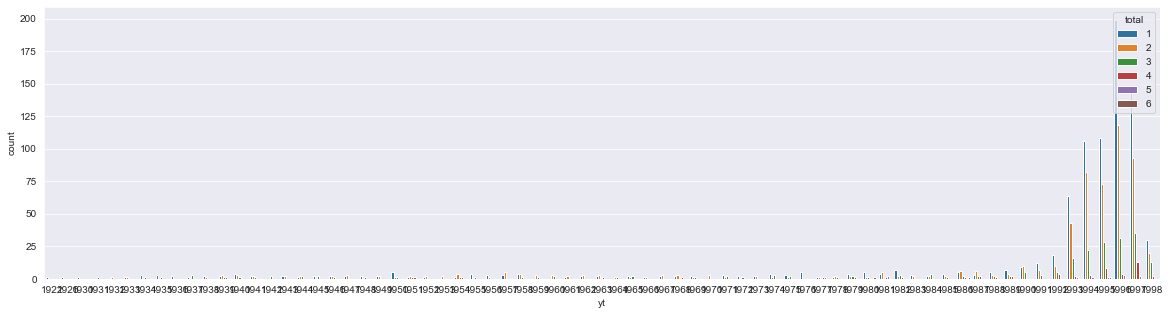

In [31]:
item[['dt','mt','yt']]=item["release date"].str.split("-", n = -1, expand = True)
plt.figure(figsize=(20,5))
sns.countplot(item['yt'],hue=item['total']);

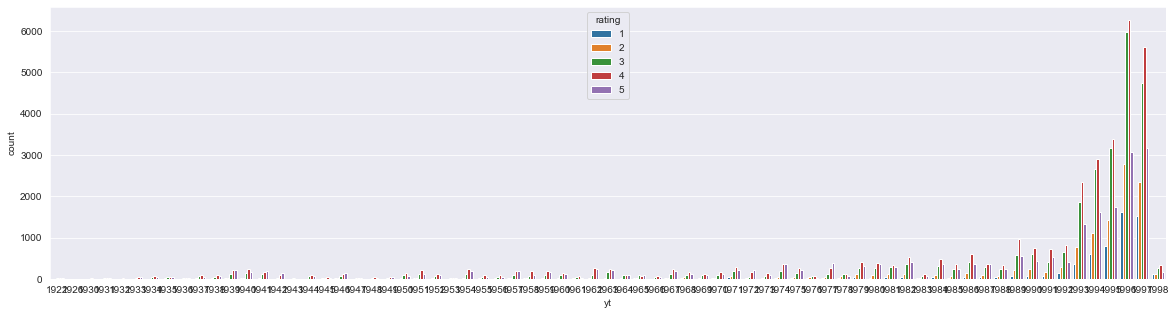

In [32]:
result=pd.merge(data,item[['movie id','release date']],on='movie id')
result[['dt','mt','yt']]=result["release date"].str.split("-", n = -1, expand = True)
plt.figure(figsize=(20,5))
#year vs Rating
sns.countplot(result['yt'],hue=result['rating'])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

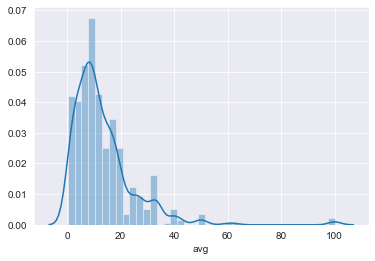

In [33]:
#your code here
newitem=item.groupby(
   ['yt']
).agg(
    {
        'unknown':sum,
        'Action':sum,
        'Adventure':sum,
        'Animation':sum,
        'Childrens':sum,
        'Comedy':sum,
        'Crime':sum,
        'Documentary':sum,
        'Drama':sum,
        'Fantasy':sum,
        'Film-Noir':sum,
        'Horror':sum,
        'Musical':sum,
        'Mystery':sum,
        'Romance':sum,
        'Sci-Fi':sum,
        'Thriller':sum,
        'War':sum,
        'Western':sum

    }
).reset_index()
t1 = pd.DataFrame(newitem, columns = ['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])
col_list= list(t1)
newitem['total']=newitem[col_list].sum(axis=1)
resultnew=newitem.melt(id_vars='yt', var_name='generic', value_name='moviescount')
resultnew = resultnew[resultnew.generic != 'total']
resultnew = resultnew[resultnew.moviescount != 0]
resultnew['total']=0
resultnew['avg']=0
resultnewplot=pd.merge(resultnew,newitem[['yt','total']],on='yt')
resultnewplot['avg']=resultnewplot['moviescount']/resultnewplot['total_y']*100
sns.distplot(resultnewplot['avg']);

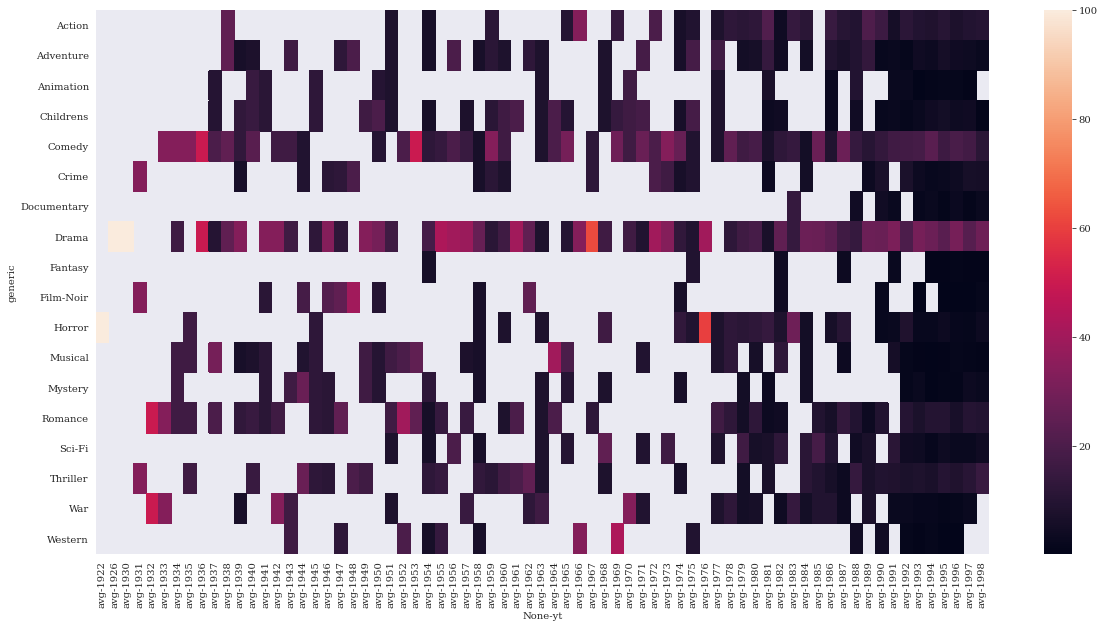

In [34]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"
heatmapdf = pd.pivot_table(resultnewplot,index=["generic"],values=["avg"],
               columns=["yt"])
sns.heatmap(heatmapdf)

**Insights:**



### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [35]:
#your code here
result9=pd.merge(data,item[['movie id','movie title']],on='movie id')
r9=result9.groupby("movie title")["rating"].agg(["count","mean"])
r9new=r9.sort_values(by='count', ascending=False)
r9new = r9new[r9new['count']>100]
r9new=r9new.sort_values(by='mean', ascending=False)
r9new.head(25)

,count,mean
movie title,,
"Close Shave, A",112,4.491071
Schindler's List,298,4.466443
"Wrong Trousers, The",118,4.466102
Casablanca,243,4.456790
"Shawshank Redemption, The",283,4.445230
Rear Window,209,4.387560
"Usual Suspects, The",267,4.385768
Star Wars,583,4.358491
12 Angry Men,125,4.344000


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [37]:
#your code here
merge10=pd.merge(data,item,on='movie id')
base=pd.merge(merge10,user,on='user id')


In [43]:
temp = base
temp = temp[temp['Drama'] !=0 ]

stat=temp.groupby(
   ['gender']
).agg(
    {
        'Drama':sum,
        'rating':sum,

    }
).reset_index()
stat
stat['d_total']=stat['Drama'].sum()
stat['r_total']=stat['rating'].sum()
stat['d_per']=stat['Drama']/stat['d_total']*100
stat['r_per']=stat['rating']/stat['r_total']*100
stat['Comment'] = stat['r_per'].apply(lambda x: 'Women Watching Lower Drama' if x < 50 else 'Men Watching Highest Drama')
print("Statement:Men watch more drama than women")
stat

Statement:Men watch more drama than women


,gender,Drama,rating,d_total,r_total,d_per,r_per,Comment
0,F,11008,40314,39895,147108,27.59243,27.404356,Women Watching Lower Drama
1,M,28887,106794,39895,147108,72.40757,72.595644,Men Watching Highest Drama


In [44]:
temp = base
temp = temp[temp['Sci-Fi'] !=0 ]

stat=temp.groupby(
   ['gender']
).agg(
    {
        'Sci-Fi':sum,
        'rating':sum,

    }
).reset_index()
stat
stat['d_total']=stat['Sci-Fi'].sum()
stat['r_total']=stat['rating'].sum()
stat['d_per']=stat['Sci-Fi']/stat['d_total']*100
stat['r_per']=stat['rating']/stat['r_total']*100
stat['Comment'] = stat['r_per'].apply(lambda x: 'Women Watching Lower Sci-Fi' if x < 50 else 'Men Watching Highest Sci-Fi')
print("Statement:Women watch more Sci-Fi than men")
stat

Statement:Women watch more Sci-Fi than men


,gender,Sci-Fi,rating,d_total,r_total,d_per,r_per,Comment
0,F,2629,9196,12730,45328,20.652003,20.287681,Women Watching Lower Sci-Fi
1,M,10101,36132,12730,45328,79.347997,79.712319,Men Watching Highest Sci-Fi


In [45]:
temp = base
temp = temp[temp['Romance'] !=0 ]

stat=temp.groupby(
   ['gender']
).agg(
    {
        'Romance':sum,
        'rating':sum,

    }
).reset_index()
stat
stat['d_total']=stat['Romance'].sum()
stat['r_total']=stat['rating'].sum()
stat['d_per']=stat['Romance']/stat['d_total']*100
stat['r_per']=stat['rating']/stat['r_total']*100
stat['Comment'] = stat['r_per'].apply(lambda x: 'Women Watching Less Romance' if x < 50 else 'Men Watching Highest Romance')
print("Statement:Men watch more Romance than women")
stat

Statement:Men watch more Romance than women


,gender,Romance,rating,d_total,r_total,d_per,r_per,Comment
0,F,5858,21415,19461,70482,30.101228,30.383644,Women Watching Less Romance
1,M,13603,49067,19461,70482,69.898772,69.616356,Men Watching Highest Romance


**Conclusion:**
    
